In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Load data
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_original = pd.read_csv('../data/original.csv')

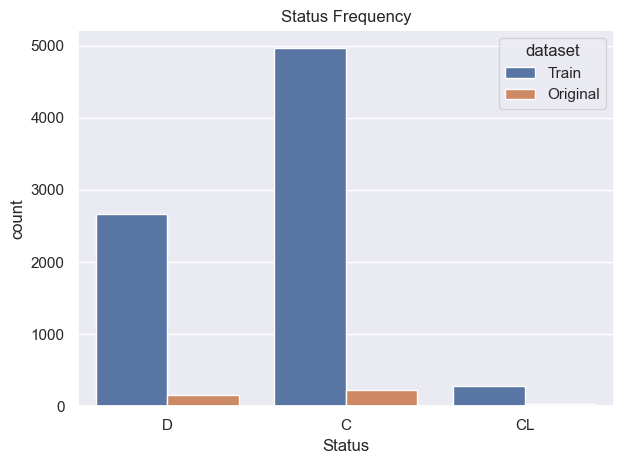

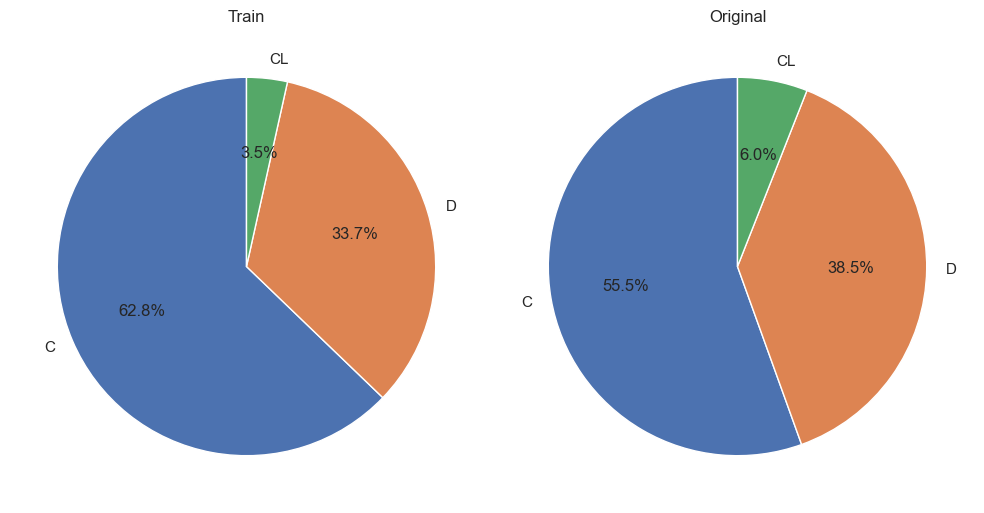

In [25]:
# Plot frequency of status labels
sns.set_theme()
df_train_original = pd.concat([df_train.assign(dataset='Train'), df_original.assign(dataset='Original')])
sns.countplot(x='Status', hue='dataset', data=df_train_original)
plt.title('Status Frequency')
plt.tight_layout()
plt.savefig('../figures/status_frequencies.png', bbox_inches='tight')
plt.show()

# Pie charts
# Train
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
status_counts_train = df_train['Status'].value_counts()
plt.pie(status_counts_train, labels=status_counts_train.index, autopct='%1.1f%%', startangle=90)
plt.title('Train')

# Original
plt.subplot(1, 2, 2)
status_counts_original = df_original['Status'].value_counts()
plt.pie(status_counts_original, labels=status_counts_original.index, autopct='%1.1f%%', startangle=90)
plt.title('Original')
plt.tight_layout()
plt.savefig('../figures/status_relative_frequencies')
plt.show()

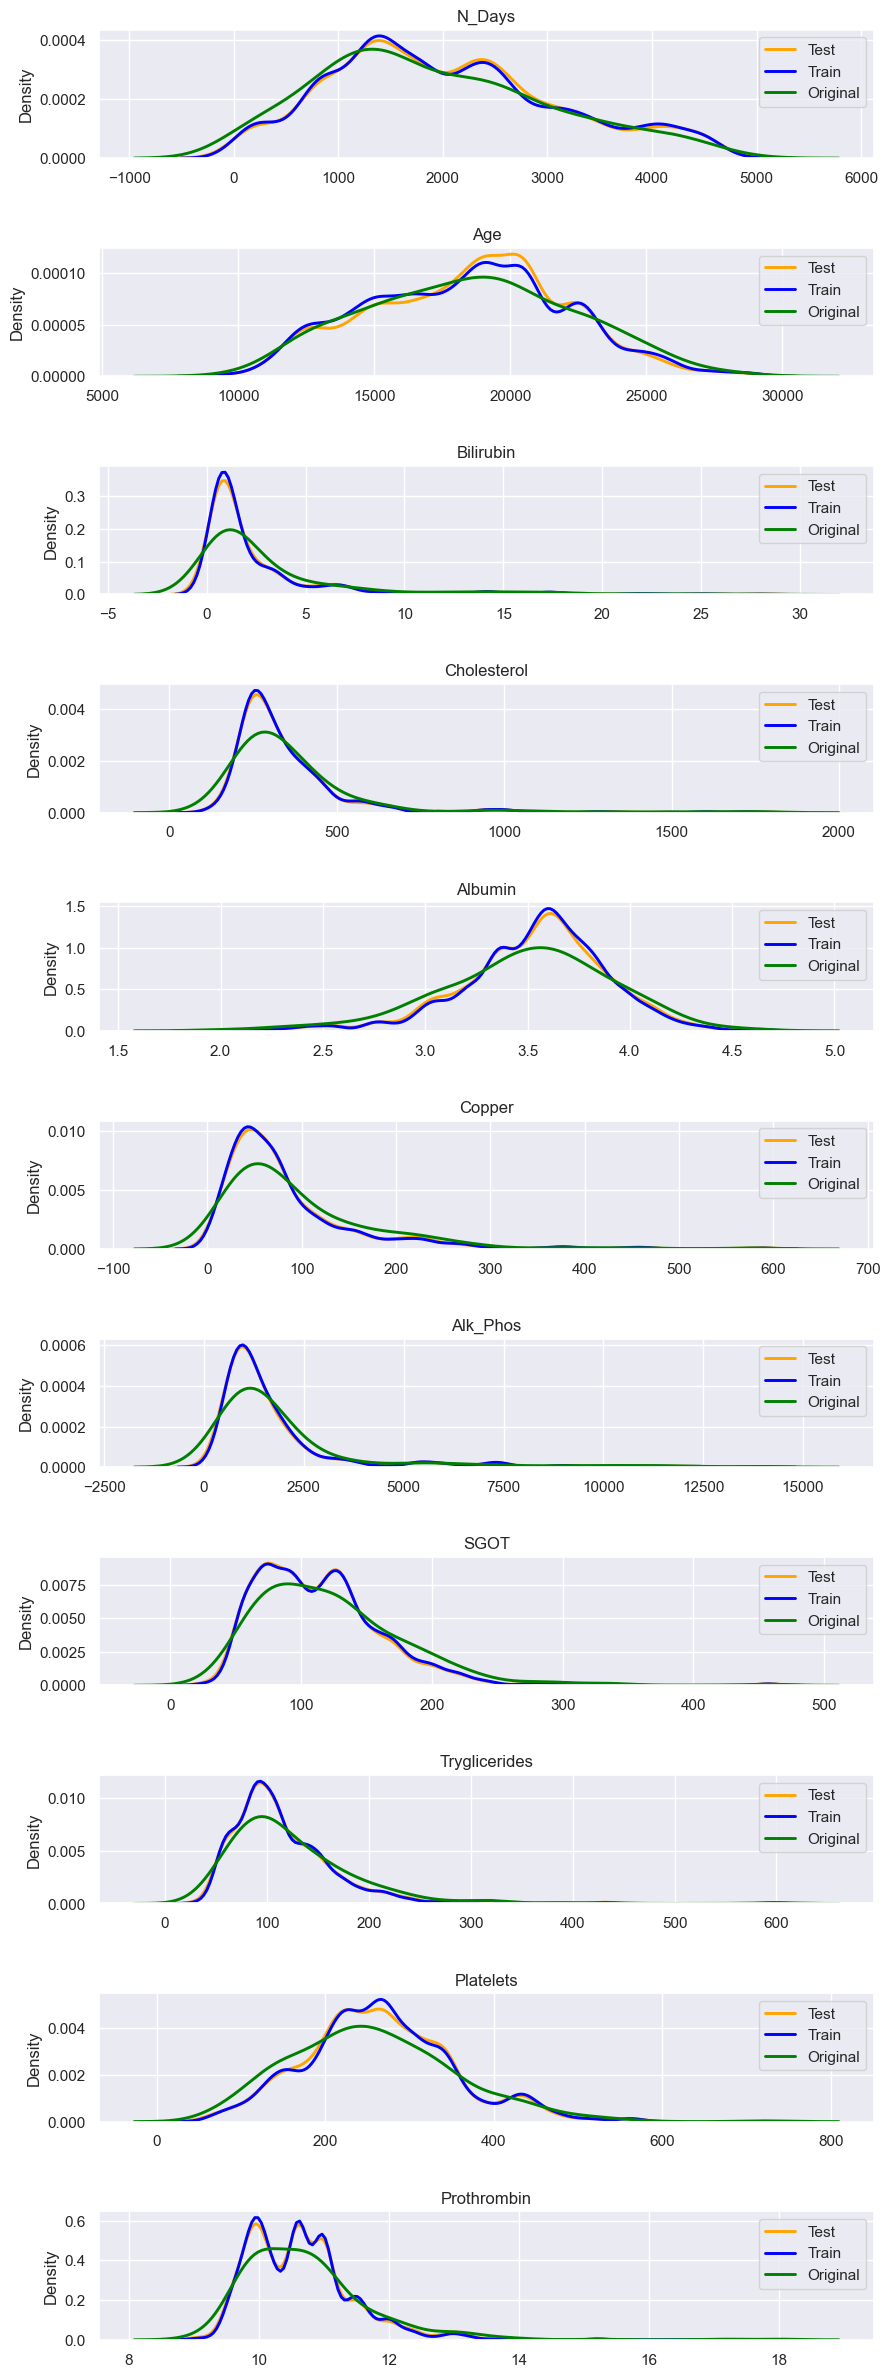

In [26]:
# Distribution of continuous features
continuous_features = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Increase the hspace parameter for more spacing between subplots
fig, axes = plt.subplots(len(continuous_features), 1, figsize=(10, 30), sharey='row', gridspec_kw={'hspace': 0.7})

for i, feature in enumerate(continuous_features):
    sns.kdeplot(x=feature, data=df_test, color='orange', label='Test', ax=axes[i], linewidth=2.1)
    sns.kdeplot(x=feature, data=df_train, color='blue', label='Train', ax=axes[i], linewidth=2.1)
    sns.kdeplot(x=feature, data=df_original, color='green', label='Original', ax=axes[i], linewidth=2.1)
    
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].legend()

plt.savefig('../figures/continuous_distributions.png', bbox_inches='tight')
plt.show()

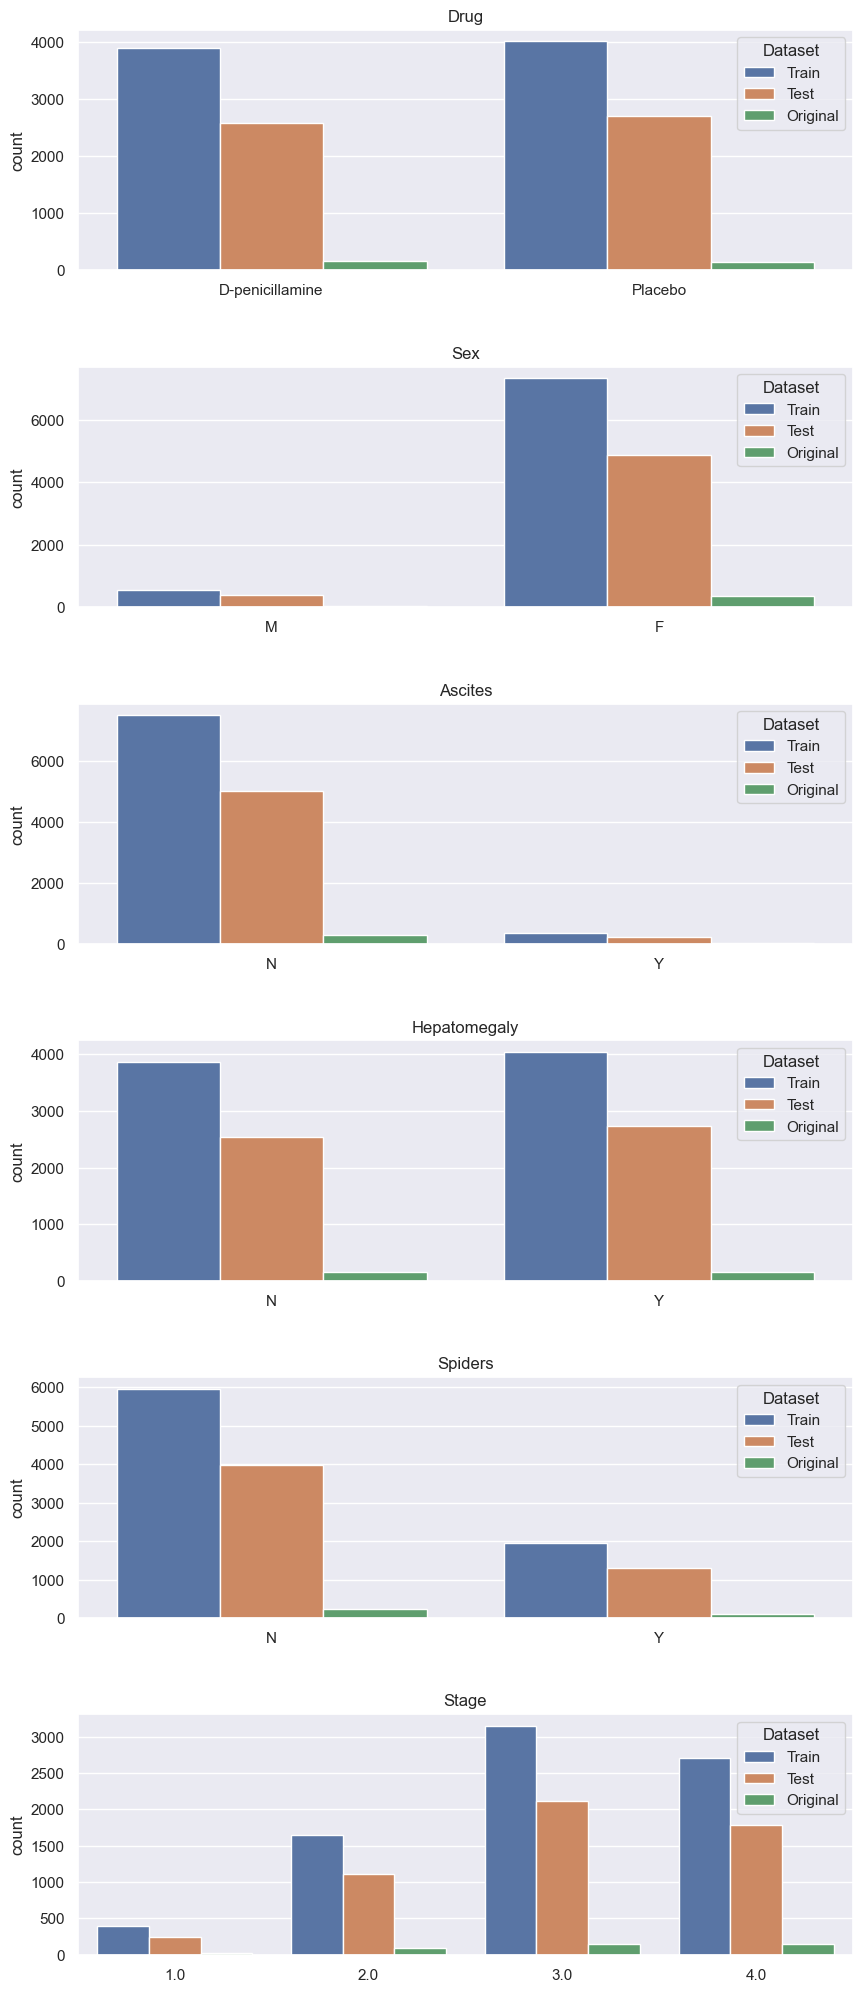

In [27]:
# Distribution of discrete features
discrete_features = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Stage']
fig, axes = plt.subplots(len(discrete_features), 1, figsize=(10, 25), sharey='row', gridspec_kw={'hspace': 0.4})

for i, feature in enumerate(discrete_features):
    sns.countplot(x=feature, data=pd.concat([df_train.assign(dataset='Train'), 
                                             df_test.assign(dataset='Test'),
                                             df_original.assign(dataset='Original')]), 
                                             hue='dataset', ax=axes[i])
    
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].legend(title='Dataset')

plt.savefig('../figures/discrete_distributions.png', bbox_inches='tight')
plt.show()

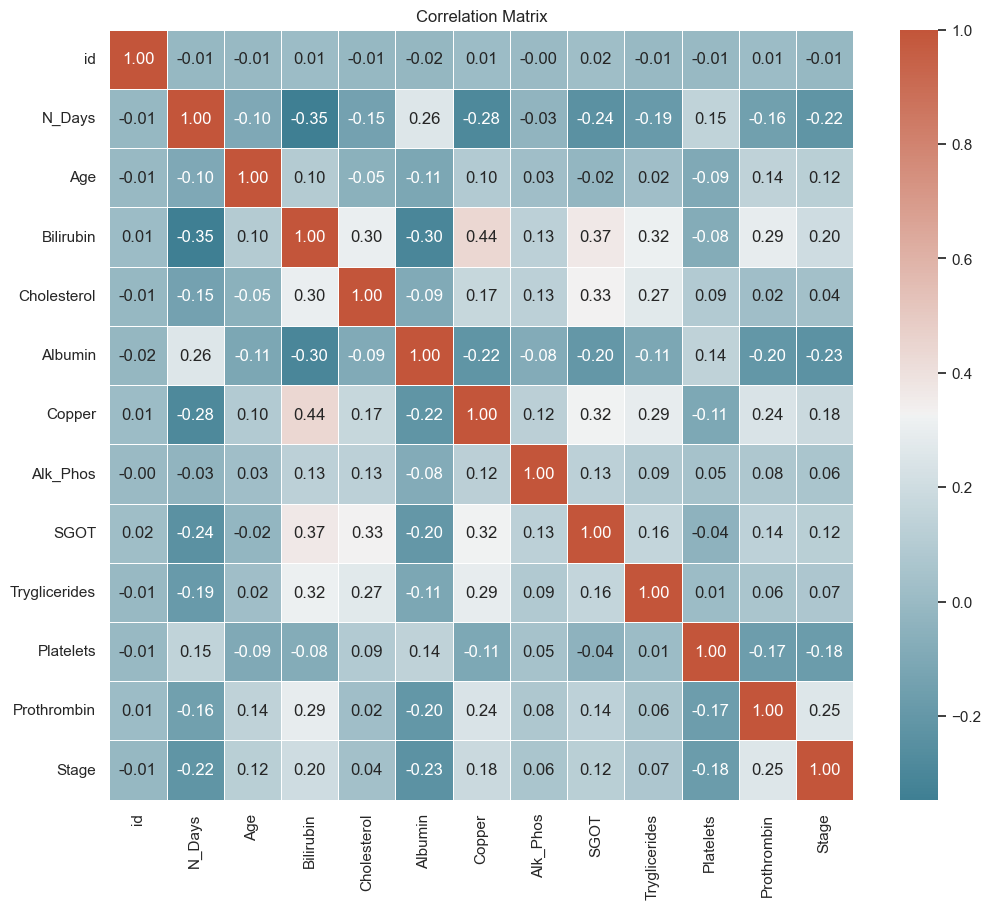

In [28]:
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix_train_numeric = df_train[numeric_columns].corr()

plt.figure(figsize=(12, 10))
palette = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix_train_numeric, annot=True, cmap=palette, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.savefig('../figures/correlation_matrix.png', bbox_inches='tight')
plt.show()